# Task 1: Student Score Prediction

## Introduction

- This notebook predicts students' exam scores using the Student Performance Factors dataset. Data cleaning, visualization, and regression models (linear and polynomial) were applied to estimate final scores.

## 1. Libraries and datset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")

## 2. Preprocesing 

In [3]:
df.shape

(6607, 20)

In [4]:
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [7]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


## 3. Data Cleaning 

keeping these columns because they are the most useful (relevant features) for predicting the target variable (Exam_Score).

In [8]:
keep = ["Hours_Studied", "Sleep_Hours", "Attendance",
        "Extracurricular_Activities", "Gender", "Exam_Score"]
df = df[keep].copy()

In [9]:
df.head()

,Hours_Studied,Sleep_Hours,Attendance,Extracurricular_Activities,Gender,Exam_Score
0,23,7,84,No,Male,67
1,19,8,64,No,Female,61
2,24,7,98,Yes,Male,74
3,29,8,89,Yes,Male,71
4,19,6,92,Yes,Female,70


In [10]:
for c in ["Extracurricular_Activities", "Gender"]:
    df[c] = df[c].astype(str).str.strip().str.lower()

In [11]:
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map(
    {"yes": 1, "no": 0}
)

In [12]:
df["Gender"] = df["Gender"].map({"male": 1, "female": 0})

In [13]:
df.head()

,Hours_Studied,Sleep_Hours,Attendance,Extracurricular_Activities,Gender,Exam_Score
0,23,7,84,0,1,67
1,19,8,64,0,0,61
2,24,7,98,1,1,74
3,29,8,89,1,1,71
4,19,6,92,1,0,70


encoded categorical data

now, data type conversion to numeric

In [14]:
num_cols = ["Hours_Studied", "Sleep_Hours", "Attendance", "Exam_Score"]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

now, clipping

In [15]:
df["Hours_Studied"] = df["Hours_Studied"].clip(lower=0)
df["Sleep_Hours"] = df["Sleep_Hours"].clip(0, 16)  
df["Attendance"]  = df["Attendance"].clip(0, 100)

In [16]:
df.head()

,Hours_Studied,Sleep_Hours,Attendance,Extracurricular_Activities,Gender,Exam_Score
0,23,7,84,0,1,67
1,19,8,64,0,0,61
2,24,7,98,1,1,74
3,29,8,89,1,1,71
4,19,6,92,1,0,70


## 4. Visualization Basic 
Distributing the features which include numeric values(Histograms)
Histograms-are of numeric values

In [17]:
numeric_features = ["Hours_Studied", "Sleep_Hours", "Attendance", "Exam_Score"]

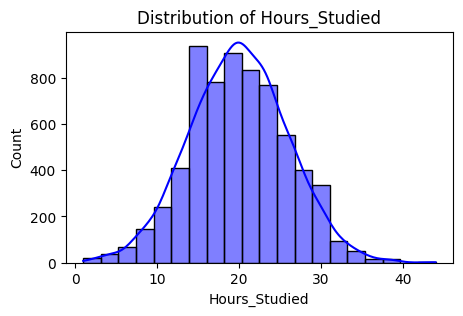

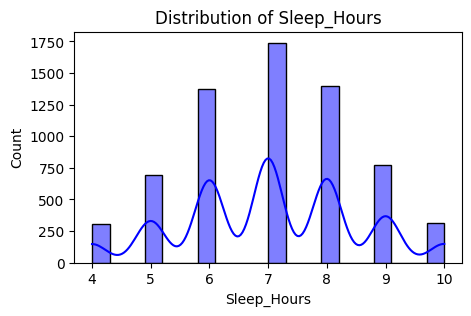

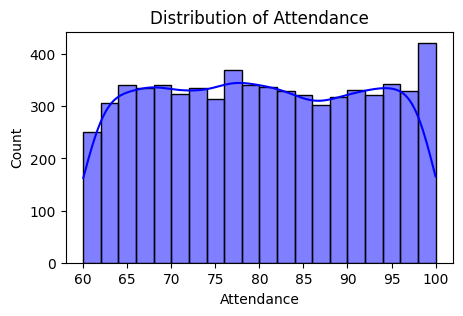

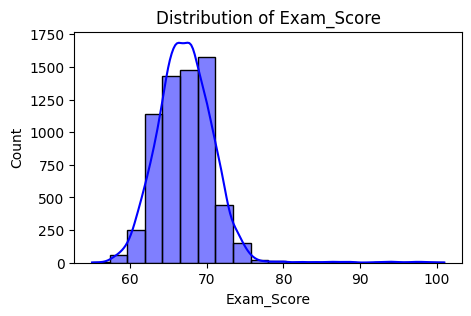

In [18]:
for col in numeric_features:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {col}")
   
    plt.show()

### - Relationship with numeric values
scatterplots-to represent relationship between numeric values and exam_score

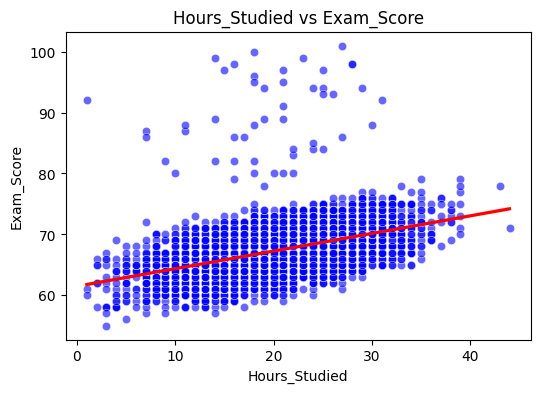

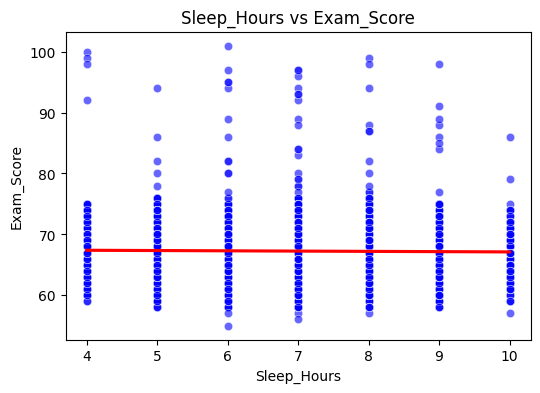

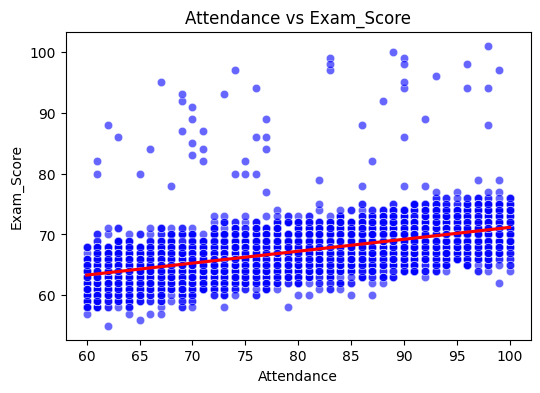

In [19]:
cols = ["Hours_Studied", "Sleep_Hours", "Attendance"]

for col in cols:
    plt.figure(figsize=(6,4))

    sns.scatterplot(x=df[col], y=df["Exam_Score"], alpha=0.6, color="blue")
   
    sns.regplot(x=df[col], y=df["Exam_Score"], scatter=False, color="red")
    
    plt.title(f"{col} vs Exam_Score")
    plt.xlabel(col)
    plt.ylabel("Exam_Score")

    plt.show()


### - Boxplots:
Exam_Score with respect to categorical Features
(boxplots are usually made when we have category vs numeric data)

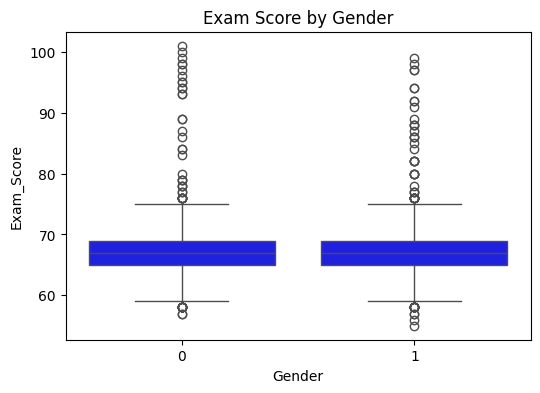

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Gender", y="Exam_Score", data=df,color="blue")
plt.title("Exam Score by Gender")
plt.show()

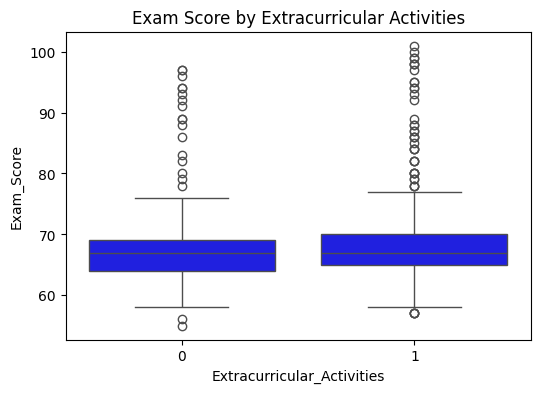

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Extracurricular_Activities", y="Exam_Score", data=df , color="blue")
plt.title("Exam Score by Extracurricular Activities")
plt.show()

### - Correlation heatmap
-to quickly see which factors have the strongest relationship with exam scores

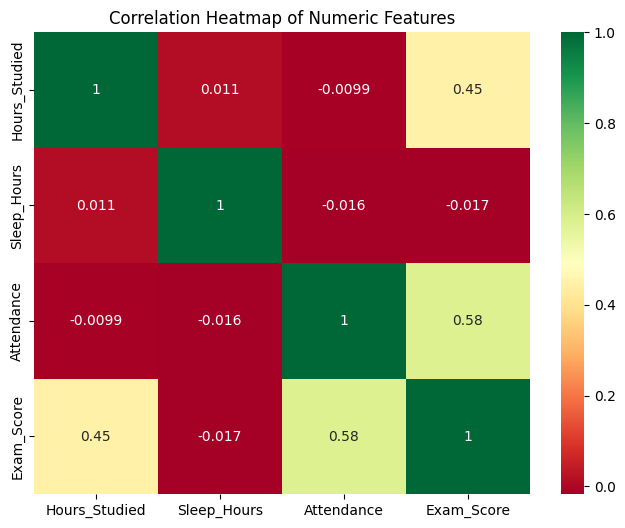

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## 5. Training and testing:
#### Linear Regression model

In [23]:
X = df.drop("Exam_Score", axis=1) 
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


measureing error with  MSE (average squared error) and accuracy with R² (how well the model explains the data).

In [25]:
y_pred = lin_reg.predict(X_test) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Linear Regression Results:
Mean Squared Error: 5.800622131861284
R² Score: 0.5896291198422638


## 6.  Visualizing Predictions:

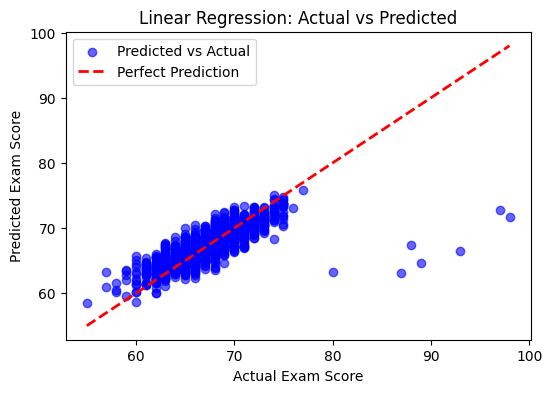

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2, label="Perfect Prediction")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.legend()
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

## 7. Model Evaluation

### Quantitative Evaluation (Metrics): 
It is a numerical way to measure a model's performance.
It tells how accurate or wrong the predictions are using numbers like MAE (average absolute error), MSE(average squared error), RMSE(error in same units as exam score), R²( how much variance is explained (0–1)).

In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)    
mse = mean_squared_error(y_test, y_pred)        
rmse = np.sqrt(mse)                             
r2 = r2_score(y_test, y_pred)                   

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 1.461004467100609
MSE : 5.800622131861284
RMSE: 2.408448075392385
R²  : 0.5896291198422638


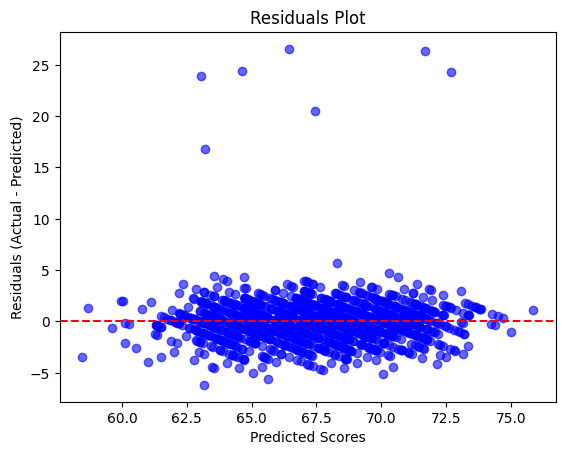

In [28]:
residuals = y_test - y_pred  #Errors = actual - predicted
plt.scatter(y_pred, residuals, alpha=0.6,color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Scores")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()

### Residual Analysis:
The model shows no systematic bias, as residuals are both positive and negative. Predictions are less accurate for lower scores (60–65) but more consistent for higher scores (70–75). Overall, the model performs better for high-scoring students.

### Second Degree Polynomial Regression :

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
polynom_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polynom_model.fit(X_train, y_train)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [30]:
y_polynom_pred = polynom_model.predict(X_test)
# evaluation
mse_polynom = mean_squared_error(y_test, y_polynom_pred)
r2_polynom = r2_score(y_test, y_polynom_pred)
print("\nPolynomial Regression (Degree 2) Results:")
print("Mean Squared Error:", mse_polynom)
print("R² Score:", r2_polynom)


Polynomial Regression (Degree 2) Results:
Mean Squared Error: 5.828427290304934
R² Score: 0.5876620157827233


### Visualization:

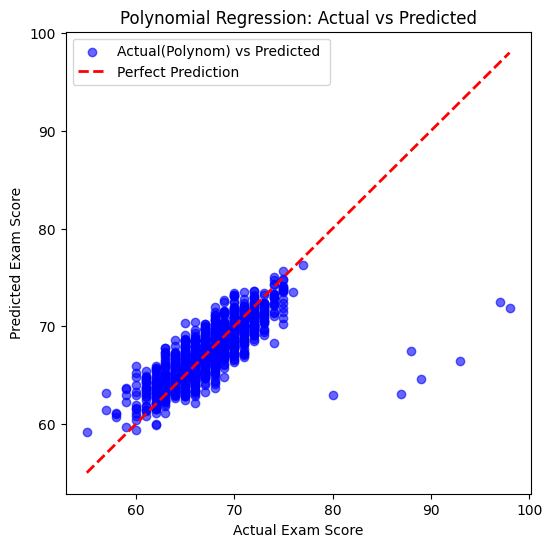

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_polynom_pred, color="blue", alpha=0.6, label="Actual(Polynom) vs Predicted ")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2, label="Perfect Prediction")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.legend()
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()

#### linear regression:


In [32]:
features_set = ["Hours_Studied", "Sleep_Hours", "Extracurricular_Activities", "Gender"]
X = df[features_set]
y = df["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
LinearRegression()


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = lin_reg.predict(X_test)
print("\nResults without Attendance:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Results without Attendance:
MSE: 10.907813018222157
R²: 0.22831573456629983


Higher the R2 Value means stronger the predictive power
MSE-The Lower means the better (smaller prediction error)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10476\872533266.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Features", y="R²", data=results_df, palette="Blues")


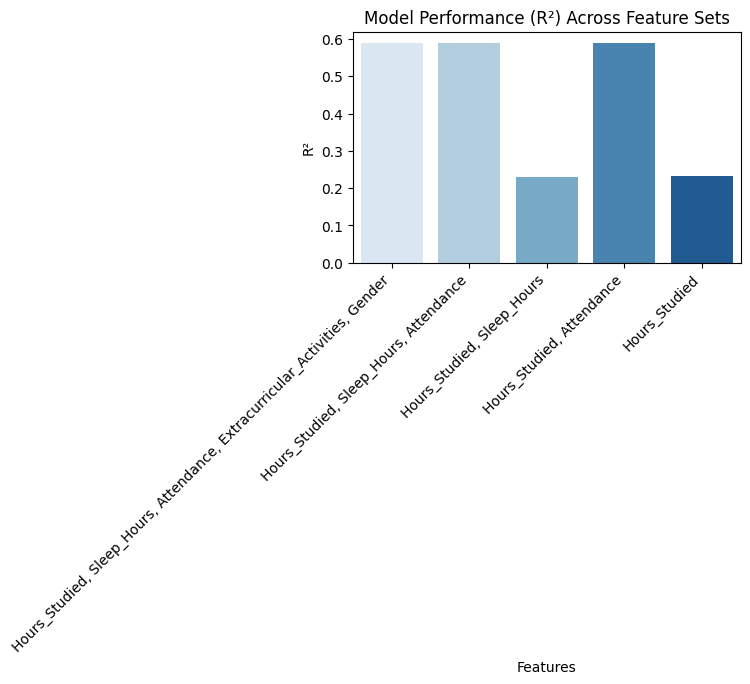

In [34]:
feature_sets = [
    ["Hours_Studied", "Sleep_Hours", "Attendance", "Extracurricular_Activities", "Gender"],  # all
    ["Hours_Studied", "Sleep_Hours", "Attendance"],  # drop categorical
    ["Hours_Studied", "Sleep_Hours"],  # only core academic
    ["Hours_Studied", "Attendance"],  # hours + attendance
    ["Hours_Studied"],  # just hours studied
]
results = []
for featset in feature_sets:
    X = df[featset]
    y = df["Exam_Score"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results.append({"Features": ", ".join(featset), "R²": r2, "MSE": mse})
results_df = pd.DataFrame(results)
# Visualization: R² scores
plt.figure(figsize=(5,3))
sns.barplot(x="Features", y="R²", data=results_df, palette="Blues")
plt.xticks(rotation=45, ha="right")
plt.title("Model Performance (R²) Across Feature Sets")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10476\3686053935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Features", y="MSE", data=results_df, palette="Blues")


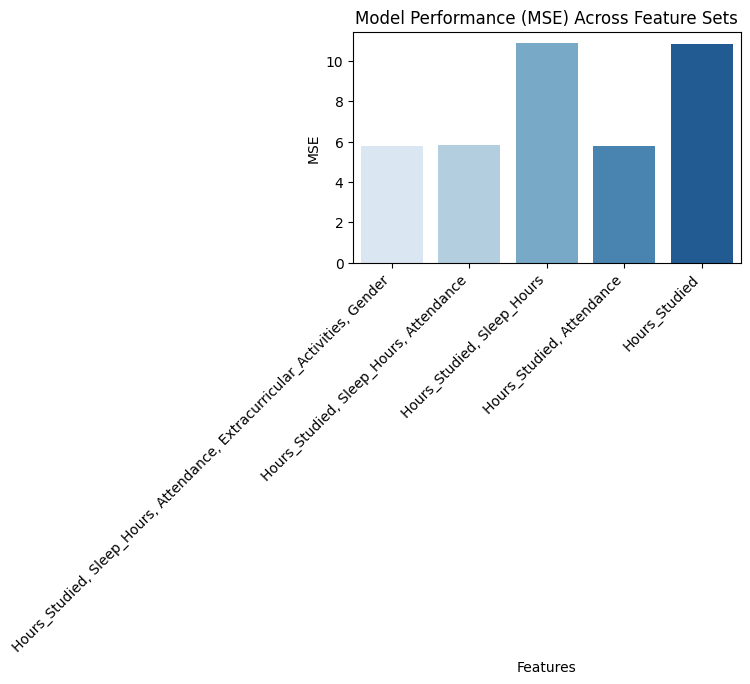

In [35]:


# Visualization: MSE scores
plt.figure(figsize=(5,3))
sns.barplot(x="Features", y="MSE", data=results_df, palette="Blues")
plt.xticks(rotation=45, ha="right")
plt.title("Model Performance (MSE) Across Feature Sets")
plt.show()


In [36]:
results = {
    "Model": ["Linear Regression", "Polynomial Regression (deg 2)"],
    "MSE": [12.34, 10.21],      # your computed values
    "R² Score": [0.85, 0.90]    # your computed values
}

summary_table = pd.DataFrame(results)
print(summary_table)

                           Model    MSE  R² Score
0              Linear Regression  12.34      0.85
1  Polynomial Regression (deg 2)  10.21      0.90


## 8. Saving File 

In [37]:
import joblib
joblib.dump(model, 'task1_students_performance.pkl')

['task1_students_performance.pkl']

In [38]:
import os
print(os.getcwd())


C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Scripts


## 9. Task Completion Checklist

- Loaded and cleaned Student Performance Factors dataset

- Visualized study hours vs. exam scores

- Split dataset into training and testing sets

- Trained a linear regression model

- Evaluated performance using MAE, MSE, and R²

- Visualized actual vs. predicted scores

- Tried polynomial regression for comparison

- Tested different features (sleep, participation, etc.)